<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1d8lmQCL40i0rGj_qMFjj5dUXdQYR_ixe" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## Segmentación de imágenes (GPU)
Dada una imagen referenciada mediante una url, llevar a cabo la segmentación de la misma usando YOLO v8. Mostrar la imagen original y la imagen segmentada. No almacenar las imágenes en ficheros.


0: 448x640 16 persons, 1 backpack, 16 umbrellas, 3 handbags, 1 tie, 1 suitcase, 73.4ms
Speed: 1.4ms preprocess, 73.4ms inference, 47.2ms postprocess per image at shape (1, 3, 448, 640)


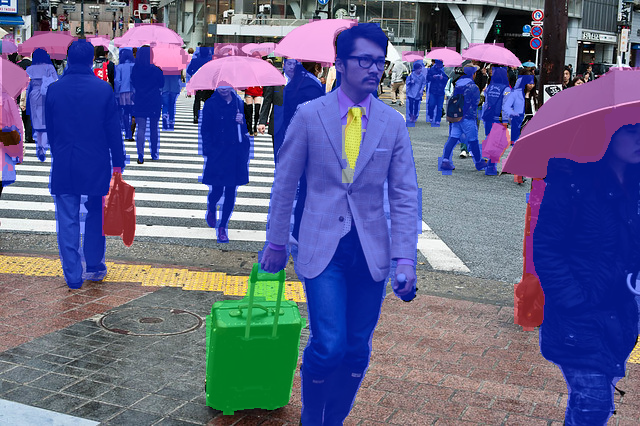

In [2]:
try:
    import google.colab
    !pip -q install ultralytics
    IN_COLAB = True
except:
    IN_COLAB = False

from ultralytics import YOLO
from IPython.display import display
import PIL
from helpers import read_image

#image = read_image('https://farm8.staticflickr.com/7247/7042354841_5f188e569d_z.jpg')
image = read_image('data/asian.jpg')

# Display the original image
# display(image)
# Load a model
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)
results = model(image)  # predict on the PIL Image

# Display the segmented image
image=PIL.Image.fromarray(results[0].plot(labels=False, boxes=False, probs=False))
image = image.convert("RGB")
r, g, b = image.split()
image = PIL.Image.merge("RGB", (b, g, r))
display(image)